#### 데이터분석, 시각화
1. 주제선정 : 마약연계 범죄 현황 / 심각성

2. 데이터 선정 : kosis.kr - 범죄좌 마약류 상용여부 (검찰청, 년도(2011 - 2021), 부산)

3. 분석 목표 : 
> 2011 ~ 2021년 부산광역시 내 마약류관리에 관한 법률위반 범죄 건수의 증감 추이

4. 데이터 읽어오기, 전처리, 통합(단일 df)

5. 데이터 탐색 (EDA)

6. 분석 목표별 분석 및 시각화

7. 결론.

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [285]:
pd_data

,시점,형법범_마약,형법범_대마,형법범_향정,특별범_마약,특별범_대마,특별범_향정,법_마약,법_대마,법_향정
0,2014,113,25,172,460,489,2440,573,514,2612
1,2015,74,13,92,280,164,715,354,177,807
2,2016,54,17,76,135,86,595,189,103,671
3,2017,37,6,81,168,136,698,205,142,779
4,2018,85,58,177,307,553,3130,392,611,3307
5,2019,85,63,183,382,979,3879,467,1042,4062
6,2020,66,44,151,457,1155,3907,523,1199,4058
7,2021,57,40,213,447,1086,3574,504,1126,3787


In [286]:
file = '범죄자_마약류_등_상용여부_20230419152204.csv'
pd_data = pd.read_csv(file, encoding = 'cp949', header = [0, 1, 2, 3, 4])
pd_data.head()
pd_data = pd_data.set_index(('시점','시점', '시점','시점', '시점'))
pd_data.index.names = ['시점']
pd_data.columns = ['형법범_마약','형법범_대마','형법범_향정','특별_마약1','특별_대마1','특별_향정1','특별_마약2','특별_대마2','특별_향정2'
                  ,'특별_마약3','특별_대마3','특별_향정3']
# 전처리
pd_data = pd_data.replace('-', 0).astype(np.int64)
# 데이터 처리
pd_data['특별범_마약'] = pd_data['특별_마약1'] + pd_data['특별_마약2'] + pd_data['특별_마약3']
pd_data['특별범_대마'] = pd_data['특별_대마1'] + pd_data['특별_대마2'] + pd_data['특별_대마3']
pd_data['특별범_향정'] = pd_data['특별_향정1'] + pd_data['특별_향정2'] + pd_data['특별_향정3']
# 필요없는 데이터 drop
pd_data.drop(['특별_마약1','특별_대마1','특별_향정1','특별_마약2','특별_대마2','특별_향정2'
                  ,'특별_마약3','특별_대마3','특별_향정3'], axis = 1, inplace = True)

pd_data = pd_data.reset_index()
df1 = pd_data.set_index('시점').stack().reset_index()
df1.columns = ['시점', '위반법률', '명수']
df1

,시점,위반법률,명수
0,2014,형법범_마약,113
1,2014,형법범_대마,25
2,2014,형법범_향정,172
3,2014,특별범_마약,460
4,2014,특별범_대마,489
5,2014,특별범_향정,2440
6,2015,형법범_마약,74
7,2015,형법범_대마,13
8,2015,형법범_향정,92
9,2015,특별범_마약,280


0.5802228771352068
0.7636857327465029
0.8988375696076858
<class 'list'>


Text(200, 80, "('상관도:', 0.7636857327465029)")

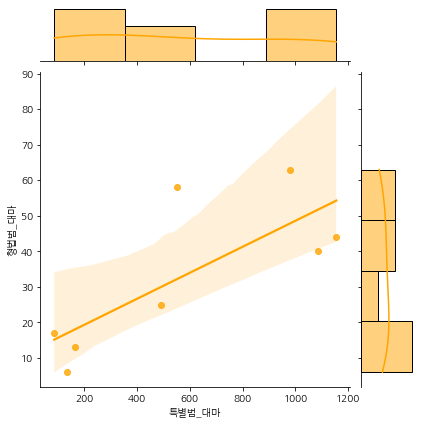

In [287]:
# 상관도 측정
print(np.corrcoef(pd_data['특별범_마약'], pd_data['형법범_마약'])[0,1])
print(np.corrcoef(pd_data['특별범_대마'], pd_data['형법범_대마'])[0,1])
print(np.corrcoef(pd_data['특별범_향정'], pd_data['형법범_향정'])[0,1])

a = np.corrcoef(pd_data['특별범_향정'], pd_data['형법범_향정'])[0,1]
b = np.corrcoef(pd_data['특별범_대마'], pd_data['형법범_대마'])[0,1]
c = np.corrcoef(pd_data['특별범_향정'], pd_data['형법범_향정'])[0,1]

sns.jointplot(data = pd_data, x = '특별범_대마', y = '형법범_대마', kind = 'reg', color = 'orange')
#sns.jointplot(data = pd_data, x = '특별범_마약', y = '형법범_마약', kind = 'reg', color = 'b')

print(type(x.figure.axes))
# 대마

bx = x.figure.axes[1]
bx.text(200, 80, ('상관도:', b), fontsize = 10)

Text(1000, 200, "('상관도:', 0.8988375696076858)")

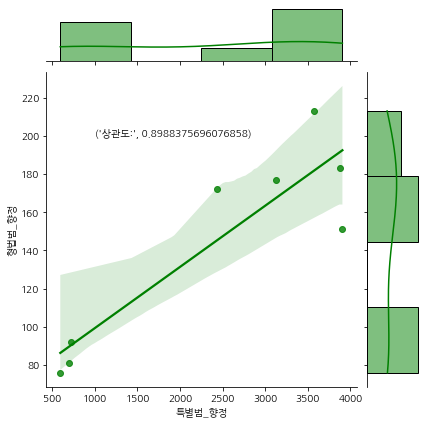

In [288]:
x = sns.jointplot(data = pd_data, x = '특별범_향정', y = '형법범_향정', kind = 'reg', color = 'g')
ax = x.figure.axes[0]
ax.text(1000, 200, ('상관도:', a), fontsize = 10)

<Axes: xlabel='시점', ylabel='형법범_마약'>

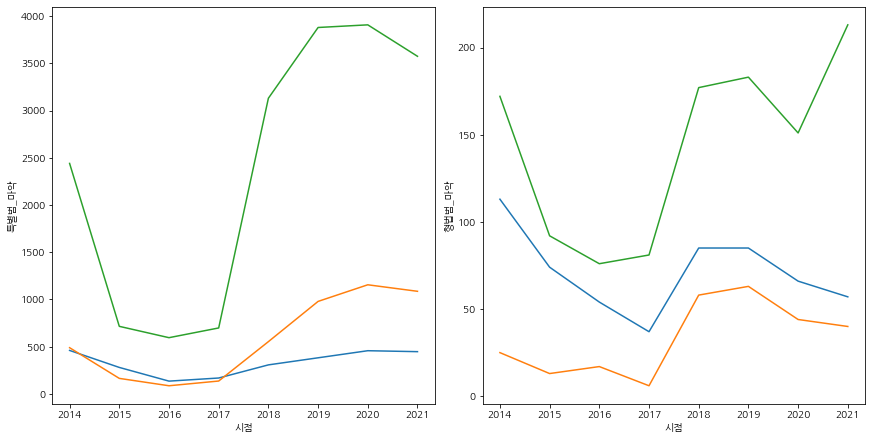

In [289]:
fig, axes = plt.subplots(1,2,figsize = (12,6), layout ='constrained')
sns.lineplot(data = pd_data, x = '시점', y = '특별범_마약', ax= axes[0])
sns.lineplot(data = pd_data, x = '시점', y = '특별범_대마', ax= axes[0])
sns.lineplot(data = pd_data, x = '시점', y = '특별범_향정', ax= axes[0])

sns.lineplot(data = pd_data, x = '시점', y = '형법범_마약', ax= axes[1])
sns.lineplot(data = pd_data, x = '시점', y = '형법범_대마', ax= axes[1])
sns.lineplot(data = pd_data, x = '시점', y = '형법범_향정', ax= axes[1])

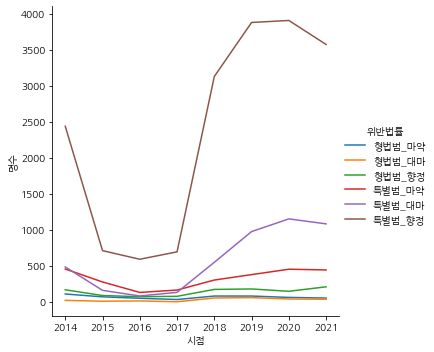

In [290]:
sns.relplot(data = df1, x = '시점', y = '명수', hue = '위반법률', kind = 'line' )
# 대략 17년도 부터 증가한다.

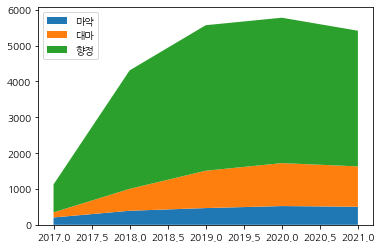

In [316]:
# 2017년 부터 증가 추이를 가지기 때문에 법을 합치고 stackplot를 그려보자
pd_data['법_마약'] = pd_data['형법범_마약'] + pd_data['특별범_마약']
pd_data['법_대마'] = pd_data['형법범_대마'] + pd_data['특별범_대마']
pd_data['법_향정'] = pd_data['형법범_향정'] + pd_data['특별범_향정']
df2 = pd_data.drop(['형법범_마약','특별범_마약','형법범_대마','특별범_대마','형법범_향정','특별범_향정'], axis = 1)
df3 = df2.drop([0, 1, 2], axis = 0)

y = df3[['법_마약', '법_대마', '법_향정']]


fig, axe = plt.subplots()
axe.stackplot(df3['시점'], [df3['법_마약'], df3['법_대마'], df3['법_향정']], labels = ['마약', '대마', '향정'])
axe.legend(loc = 'upper left')

In [292]:
# 새로 시작 , 여성 마약 여부 확인

fi = '여성범죄자_마약류_등_상용여부_20230419192241.csv'
pd_da = pd.read_csv(fi, encoding = 'cp949', header = [0, 1])
pd_da.drop(('죄종별(1)', '죄종별(1)'), axis = 1, inplace = True)
pd_fe = pd_da.set_index(('시점', '시점'))
pd_fe.index.names = ['시점']
pd_fe.columns = ['여성마약', '여성대마', '여성향정']
pd_fe
#비율 : 마약 대마 향정 => 년도별 비율추이 법은 더하고, stackplot

,여성마약,여성대마,여성향정
시점,,,
2014,33,31,329
2015,9,11,98
2016,12,12,100
2017,14,22,116
2018,64,48,593
2019,109,106,763
2020,141,95,865
2021,123,122,871


In [301]:
# 학생 마약 여부 확인

file_2 = '학생범죄자_마약류_등_상용여부_20230419202756.csv'
pd_stu = pd.read_csv(file_2, encoding = 'cp949', header = [0,1,2])
pd_stu = pd_stu.replace('-', 0)
pd_stu = pd_stu.set_index(('시점', '시점', '시점'))
pd_stu.index.names = ['시점']
pd_stu.columns = ['학생마약', '학생대마', '학생향정']
pd_stu = pd_stu.astype(np.int64)
pd_stu

,학생마약,학생대마,학생향정
시점,,,
2014,9,42,41
2015,0,15,6
2016,0,4,7
2017,1,6,5
2018,1,33,38
2019,1,58,39
2020,28,92,52
2021,38,70,58


In [294]:
# 외국인 마약 여부 확인
file3 = '외국인범죄자_마약류_등_상용여부_20230419203723.csv'
pd_for = pd.read_csv(file3, encoding = 'cp949', header = [0,1,2])
pd_for = pd_for.set_index(('시점', '시점', '시점'))
pd_for.index.names = ['시점']
pd_for.columns = ['외국인마약', '외국인대마', '외국인향정']
pd_for

,외국인마약,외국인대마,외국인향정
시점,,,
2014,13,92,124
2015,3,18,62
2016,3,6,54
2017,2,10,34
2018,9,53,325
2019,24,83,497
2020,34,128,621
2021,53,108,715


In [295]:
# 합치기 

df2 = df2.set_index('시점')

<Axes: xlabel='시점', ylabel='여성마약'>

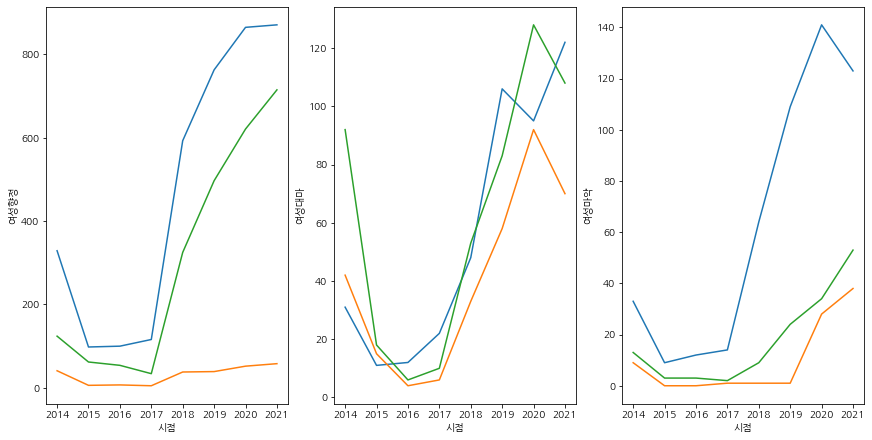

In [307]:
df4 = pd.concat((df2, pd_fe, pd_stu, pd_for), axis = 1)
df4.reset_index()

fig3, axes3 = plt.subplots(1,3, figsize = (12,6), layout = 'constrained')
sns.lineplot(data = df4, x = '시점', y = '여성향정', ax = axes3[0])
sns.lineplot(data = df4, x = '시점', y = '학생향정', ax = axes3[0])
sns.lineplot(data = df4, x = '시점', y = '외국인향정', ax = axes3[0])
#axes3[0].title('여성, 학생, 외국인 향정상용 추이')


sns.lineplot(data = df4, x = '시점', y = '여성대마', ax = axes3[1])
sns.lineplot(data = df4, x = '시점', y = '학생대마', ax = axes3[1])
sns.lineplot(data = df4, x = '시점', y = '외국인대마', ax = axes3[1])


sns.lineplot(data = df4, x = '시점', y = '여성마약', ax = axes3[2])
sns.lineplot(data = df4, x = '시점', y = '학생마약', ax = axes3[2])
sns.lineplot(data = df4, x = '시점', y = '외국인마약', ax = axes3[2])

In [312]:
df4 = df4.astype(np.int64)
df4

,법_마약,법_대마,법_향정,여성마약,여성대마,여성향정,학생마약,학생대마,학생향정,외국인마약,외국인대마,외국인향정
시점,,,,,,,,,,,,
2014,573,514,2612,33,31,329,9,42,41,13,92,124
2015,354,177,807,9,11,98,0,15,6,3,18,62
2016,189,103,671,12,12,100,0,4,7,3,6,54
2017,205,142,779,14,22,116,1,6,5,2,10,34
2018,392,611,3307,64,48,593,1,33,38,9,53,325
2019,467,1042,4062,109,106,763,1,58,39,24,83,497
2020,523,1199,4058,141,95,865,28,92,52,34,128,621
2021,504,1126,3787,123,122,871,38,70,58,53,108,715


In [314]:
#마약상관도 비교
#여성
print(np.corrcoef(df4['법_마약'], df4['여성마약'])[0,1])
print(np.corrcoef(df4['법_대마'], df4['여성대마'])[0,1]) # 상관도 높다,
print(np.corrcoef(df4['법_향정'], df4['여성향정'])[0,1]) # 상관도 높다.
print('')
#학생
print(np.corrcoef(df4['법_마약'], df4['학생마약'])[0,1])
print(np.corrcoef(df4['법_대마'], df4['학생대마'])[0,1]) # 상관도 높다.
print(np.corrcoef(df4['법_향정'], df4['학생향정'])[0,1]) # 상관도 높다.
print('')
#외국인
print(np.corrcoef(df4['법_마약'], df4['외국인마약'])[0,1])
print(np.corrcoef(df4['법_대마'], df4['외국인대마'])[0,1]) # 상관도 높다.
print(np.corrcoef(df4['법_향정'], df4['외국인향정'])[0,1])

0.667661015546599
0.9599854051296577
0.9690945173792376

0.5831255087845835
0.9679295907656589
0.9428287344097914

0.66356052957103
0.925400954126114
0.8979448341950548
